Nova IMS - Post-graduation Data Science for Finance
Algorithmic Trading Group Assignment
Group members:
- 
-
- 
- 
- 

In [16]:
#imports
import pandas as pd
import yfinance as yf
!pip install pandas_ta
import pandas_ta as ta
import plotly.graph_objects as go
from datetime import datetime, date
import backtrader as bt
import numpy as np

In [2]:
#Download S&P500 data from Yahoo Finance
spy = yf.download('SPY', start='1996-01-01', end='2005-12-31', interval='1d') #S&P500 ETF

[*********************100%***********************]  1 of 1 completed


In [3]:
#S&P500 ETF dataframe
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02 00:00:00-05:00,61.406250,62.140625,61.343750,62.140625,38.113785,514400
1996-01-03 00:00:00-05:00,62.343750,62.500000,62.000000,62.312500,38.219212,610300
1996-01-04 00:00:00-05:00,62.390625,62.625000,61.218750,61.718750,37.855034,1129700
1996-01-05 00:00:00-05:00,61.312500,61.750000,61.171875,61.593750,37.778355,302400
1996-01-08 00:00:00-05:00,61.812500,61.906250,61.734375,61.828125,37.922115,179900
...,...,...,...,...,...,...
2005-12-23 00:00:00-05:00,126.779999,126.860001,126.419998,126.760002,90.349037,27977300
2005-12-27 00:00:00-05:00,126.959999,127.050003,125.379997,125.470001,89.429565,44499500
2005-12-28 00:00:00-05:00,125.739998,125.989998,125.500000,125.750000,89.629143,30764300


In [26]:
#add moving averages to our data
spy['log_ajusted_close'] = np.log(spy['Adj Close'])
spy['MA_1'] = spy['Adj Close'].rolling(window=5).mean()
spy['MA_2'] = spy['Adj Close'].rolling(window=10).mean()
spy['MA_4'] = spy['Adj Close'].rolling(window=20).mean()
spy['MA_10'] = spy['Adj Close'].rolling(window=50).mean()
spy['MA_20'] = spy['Adj Close'].rolling(window=100).mean()
spy['MA_EW'] = (spy['MA_1'] + spy['MA_2'] + spy['MA_4'] + spy['MA_10'] + spy['MA_20']) / 5

In [28]:
#Display all table
pd.set_option('display.max_rows', None)  # Show all rows
spy

,Open,High,Low,Close,Adj Close,Volume,MA_1,log_ajusted_close,MA_2,MA_4,MA_10,MA_20,MA_EW
Date,,,,,,,,,,,,,
1996-01-02 00:00:00-05:00,61.406250,62.140625,61.343750,62.140625,38.113785,514400,NaN,3.640576,NaN,NaN,NaN,NaN,NaN
1996-01-03 00:00:00-05:00,62.343750,62.500000,62.000000,62.312500,38.219212,610300,NaN,3.643338,NaN,NaN,NaN,NaN,NaN
1996-01-04 00:00:00-05:00,62.390625,62.625000,61.218750,61.718750,37.855034,1129700,NaN,3.633764,NaN,NaN,NaN,NaN,NaN
1996-01-05 00:00:00-05:00,61.312500,61.750000,61.171875,61.593750,37.778355,302400,NaN,3.631736,NaN,NaN,NaN,NaN,NaN
1996-01-08 00:00:00-05:00,61.812500,61.906250,61.734375,61.828125,37.922115,179900,37.977700,3.635534,NaN,NaN,NaN,NaN,NaN
1996-01-09 00:00:00-05:00,62.015625,62.062500,60.625000,60.765625,37.270458,415500,37.809035,3.618201,NaN,NaN,NaN,NaN,NaN
1996-01-10 00:00:00-05:00,60.687500,60.812500,59.640625,59.968750,36.781677,787700,37.521528,3.605000,NaN,NaN,NaN,NaN,NaN
1996-01-11 00:00:00-05:00,60.062500,60.328125,59.781250,60.328125,37.002098,513200,37.350941,3.610975,NaN,NaN,NaN,NaN,NaN
1996-01-12 00:00:00-05:00,60.484375,60.500000,59.671875,60.234375,36.944603,390400,37.184190,3.609420,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='Date'>

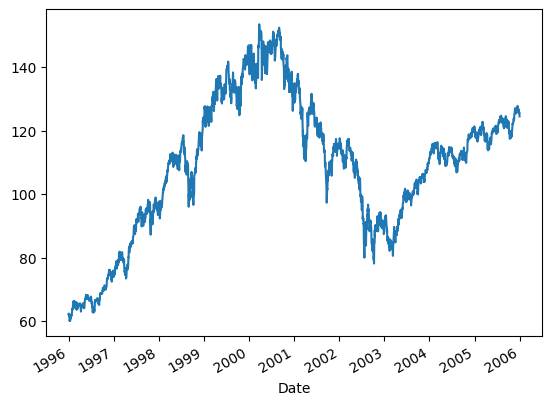

In [4]:
#Plot S&P500 ETF close price 
spy.Close.plot()

### Buy and Hold Strategy

In [5]:
#Create a function in backtrater library for buy and hond strategy
class BuyAndHold(bt.Strategy):
    def start(self):
        self.val_start = self.broker.get_cash()  # keep the starting cash

    def nextstart(self):
        # Buy all the available cash
        size = int(self.broker.get_cash() / self.data)
        self.buy(size=size)

    def stop(self):
        # calculate the actual returns
        self.roi = (self.broker.get_value() / self.val_start) - 1.0
        print('ROI:        {:.2f}%'.format(100.0 * self.roi))


Starting Portfolio Value:  10,000.00
ROI:        99.47%
Final Portfolio Value: 19,946.60


<IPython.core.display.Javascript object>


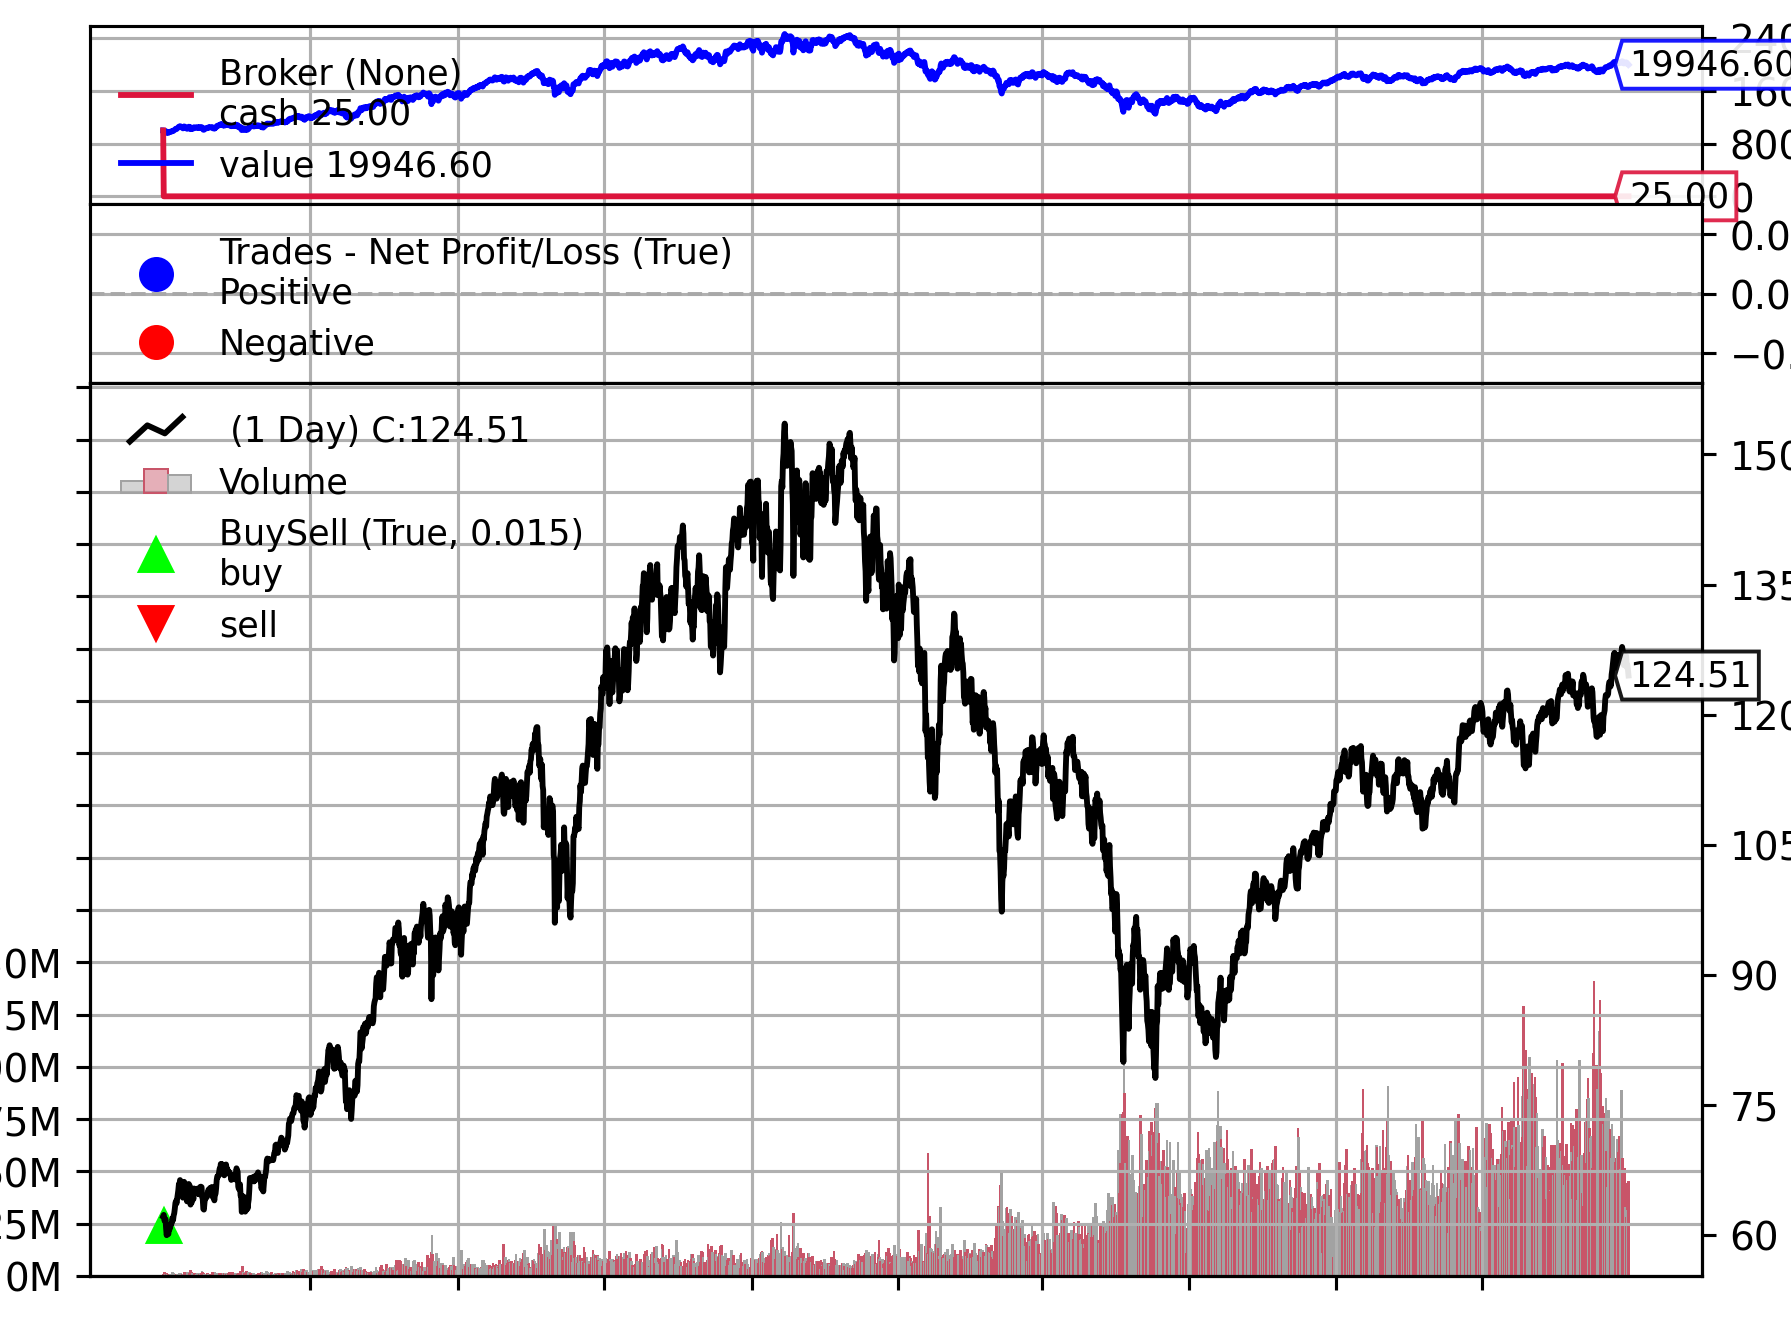

[[<Figure size 640x480 with 4 Axes>]]

In [6]:
#initialize backtrater
cerebro = bt.Cerebro()
cerebro.broker.setcash(10000)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue(): ,.2f}')

#Run the model
spy_bt = bt.feeds.PandasData(dataname=spy)
cerebro.adddata(spy_bt)
cerebro.addstrategy(BuyAndHold)
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():,.2f}')
cerebro.plot(iplot=True)

In [8]:
cerebro = bt.Cerebro()
cerebro.broker.setcash(10000)
spy_bt = bt.feeds.PandasData(dataname=spy)
cerebro.adddata(spy_bt)
cerebro.addsizer(bt.sizers.PercentSizer, percents=25)
cerebro.addstrategy(RsiSma)
cerebro.broker.setcommission(commission=0.005)
#cerebro.addanalyzer(bt.analyzers.SharpeRatio, annualize=True)
#cerebro.addanalyzer(bt.analyzers.Returns)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():,.2f}')
results = cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():,.2f}')

#print('Sharpe Ratio: ', results[0].analyzers.sharperatio.get_analysis()['sharperatio'])
#print('Returns: ', results[0].analyzers.returns.get_analysis().get('rtot'))
cerebro.plot(iplot=True)

NameError: name 'RsiSma' is not defined

Starting Portfolio Value: 10,000.00
Starting Value: 10,000.00
Ending   Value: 10,144.33
Final Portfolio Value: 10,144.33


<IPython.core.display.Javascript object>


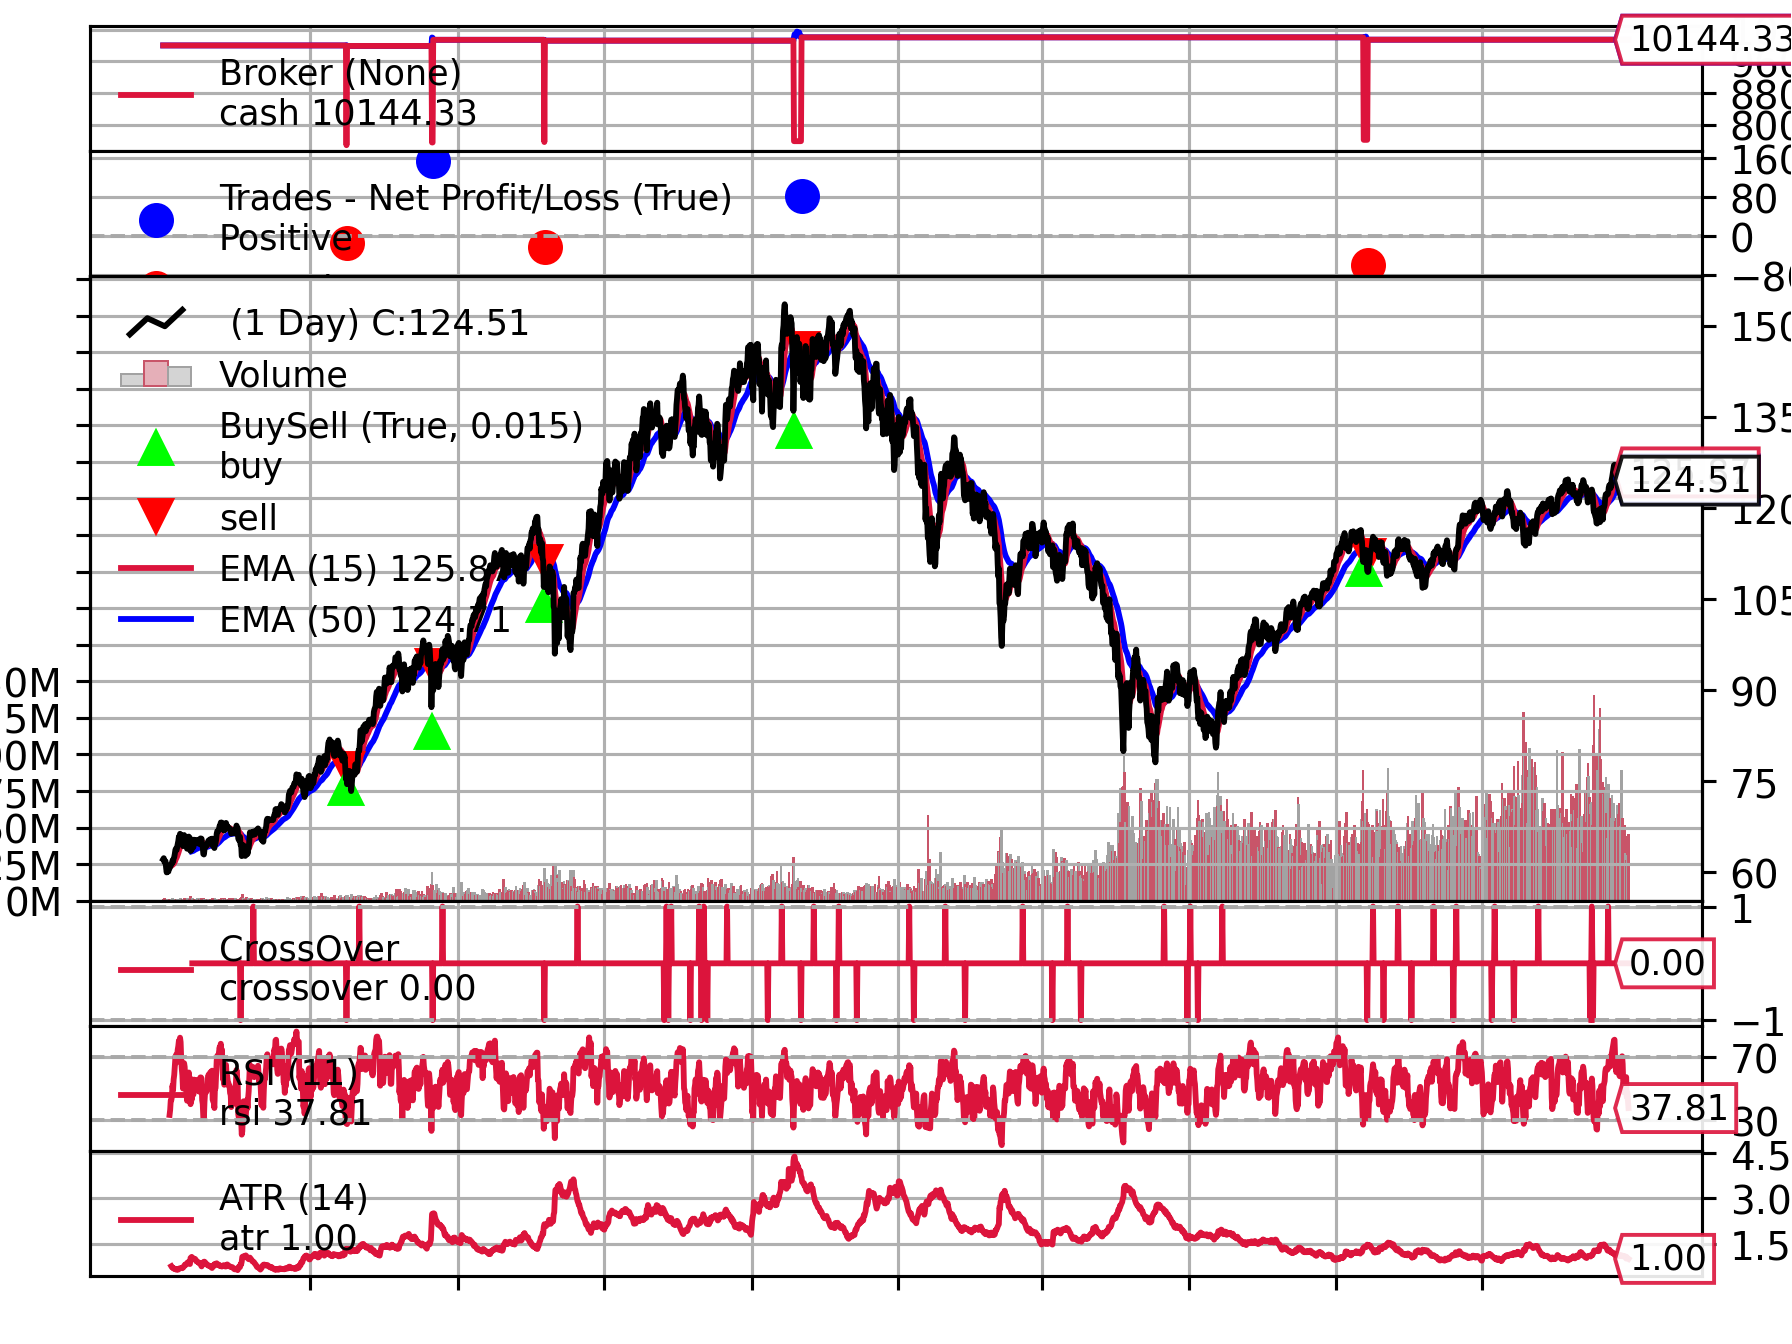

[[<Figure size 640x480 with 7 Axes>]]

In [10]:
#Create a class to test our strategy
class TradingStrategy(bt.Strategy):
    """
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))"""

        
    def __init__(self):
        #indicator to use in strategy
        self.rsi = bt.indicators.RSI(self.data.close, period=11)
        self.ema_fast = bt.indicators.EMA(period=15)
        self.ema_slow = bt.indicators.EMA(period=50)
        self.crossover = bt.ind.CrossOver(self.ema_fast, self.ema_slow)  # crossover signal
        self.atr = bt.indicators.ATR(self.data, period=14)
        
        
        
    def next(self):
        #implement the trading logic
        if not self.position:  # not in the market
            #Logic for long order
            if self.rsi < 30 and self.ema_fast > self.ema_slow:
                self.buy()
            #Logic for short order    
            """elif self.rsi < 70 and self.rsi[-1] >= 70 and self.data.close[0] < self.sma[0]:
                self.sell()  # enter short"""
                  
        #close open orders
        else:
            if self.crossover < 0:  # in the market & cross to the downside
                    self.close()
            """elif self.position.size < 0:# The open position is a sell
                self.data.close[0] > self.sma_close[0]
                self.close()  #close short position"""
            

    def stop(self):
        self.close()
        print('==================================================')
        print(f'Starting Value: {self.broker.startingcash:,.2f}')
        print(f'Ending   Value: {self.broker.getvalue():,.2f}')
        print('==================================================')

        
        
cerebro = bt.Cerebro()
cerebro.broker.setcash(10000)
#rename columns name because of indicator
spy_bt = bt.feeds.PandasData(dataname=spy)
cerebro.adddata(spy_bt)
cerebro.addsizer(bt.sizers.PercentSizer, percents=25)
cerebro.addstrategy(TradingStrategy)
cerebro.broker.setcommission(commission=0.005)
#cerebro.addanalyzer(bt.analyzers.SharpeRatio, annualize=True)
#cerebro.addanalyzer(bt.analyzers.Returns)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():,.2f}')
results = cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():,.2f}')

#print('Sharpe Ratio: ', results[0].analyzers.sharperatio.get_analysis()['sharperatio'])
#print('Returns: ', results[0].analyzers.returns.get_analysis().get('rtot'))
cerebro.plot(iplot=True)
        